# Kaggle Outbrain competition
https://www.kaggle.com/c/outbrain-click-prediction
#### This is an initial analysis of the data as part of the 'Create your Data Story' project for Springboard Data Science Intensive course.

In [4]:
# Imports
# pandas
import pandas as pd
from pandas import Series,DataFrame
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from datetime import datetime
#sns.set_style('whitegrid')
%matplotlib inline

In [6]:
clicks_train = pd.read_csv('./data/clicks_train.csv',  dtype={"display_id": int, "ad_id": int, "clicked": int})

In [7]:
train_grp_ad = clicks_train.groupby(clicks_train['ad_id'])

In [8]:
ctr = train_grp_ad['clicked'].mean()

how many ads were clicked per session. 

how many session an ad was clicked versus no ad was clicked

In [11]:
c = train_grp_ad['clicked'].sum()

In [12]:
all_clicked = c[c != 0]

In [13]:
not_clicked = c[c == 0]

In [14]:
not_clicked.shape[0] * 100 /c.shape[0]

46

### Almost 47% of ads were not even clicked once

## How often were the ads repeated?

In [15]:
repeat = train_grp_ad['clicked'].count()

In [16]:
repeat.mean()

181.9432738281658

## Each Ad was repeated on an average 182 times

## Is there is relationship between the number of times an ad is repeated and it's CTR?

In [17]:
repeat.corr(ctr)

0.022056326354103151

## Corelation is almost 0

## But how about only ads that were clicked atleast once?

In [18]:
repeat.corr(ctr[ctr > 0])

-0.041137348769934606

## There is a negative correlation as expected but it is still negligible

## But how frequently and at what times did these click happen? 
## For that lets look at the distribution of the display_ids...

In [32]:
events_df = pd.read_csv('./data/events.csv',  dtype={"display_id": int, "uuid": str, "document_id": int, "timestamp": int, "platform": str, "geo_location": str})

### How about distribution of ad during the day? Where there times during the day where more ads were clicked?

In [20]:
## normalization to start of hour
timestamps_hrly = (events_df.timestamp // (3600 * 1000)) % 24


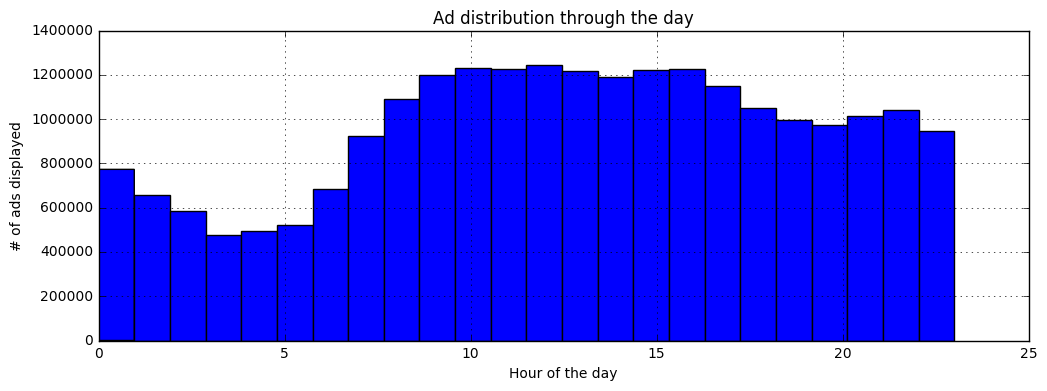

In [21]:
plt.figure(figsize=(12,4))
ax = timestamps_hrly.hist(bins=24)
ax.set_xlabel("Hour of the day")
ax.set_ylabel("# of ads displayed")
plt.title("Ad distribution through the day")

0 is

GMT: Tue, 14 Jun 2016 03:59:59.998 GMT

US Eastern: Monday, June 13, 2016 11:59:59 PM GMT-4:00 DST

### It appears that acitivity picks up after 8:00am in the afternoon till around 10:00pm in the night

In [34]:
map = events_df['geo_location'].drop_duplicates()

In [35]:
map = map.str.split('>', expand=True).rename(columns={0:'Country', 1:'State', 2: 'DMA'}).join(map)

In [36]:
a = pd.merge(events_df, map, on='geo_location')

In [37]:
a.head()

,display_id,uuid,document_id,timestamp,platform,geo_location,Country,State,DMA
0,1,cb8c55702adb93,379743,61,3,US>SC>519,US,SC,519
1,4259,7110c665e40cdd,1178289,291717,3,US>SC>519,US,SC,519
2,4320,d4d864f476b3ec,1226959,296045,2,US>SC>519,US,SC,519
3,4404,6a7174e486a1fa,26448,300907,3,US>SC>519,US,SC,519
4,4565,1ae3131f93a2d9,1750803,312675,1,US>SC>519,US,SC,519


In [38]:
geogrp = a.groupby(['Country'])  #, 'State', 'DMA'])

In [39]:
x = geogrp.size().sort_values(ascending=False)

In [40]:
x = x * 100/x.sum()

In [41]:
y = x.sort_values(ascending=False).head(10)

## Distribution by Country (top 10)

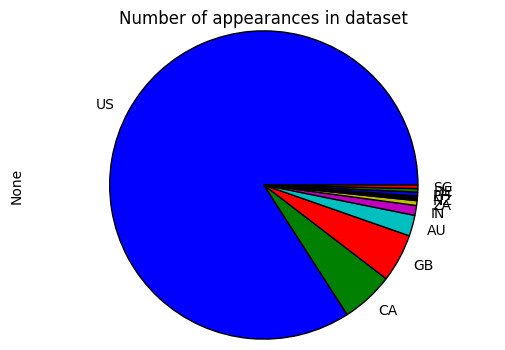

In [42]:
y.plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')

## Most of the clicks came from US customers.

In [74]:
usgrp = geogrp.get_group('US')

In [91]:
usgrp[usgrp.State ==None]

,display_id,uuid,document_id,timestamp,platform,geo_location,Country,State,DMA


In [95]:
usgrp.loc[usgrp.State =='AE','State'] = 'CA'


In [96]:
state = usgrp.groupby(['State'])

In [ ]:
state_series = state.size().sort_values(ascending=False)

In [ ]:
state_series * 100/state_series.sum()

In [ ]:
state.head()

In [45]:
!pip install us

  Running setup.py bdist_wheel for us ... - done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/1c/18/a6/f0a1651888a6c980d14ce6c68ae0bff4419e20bce4f2473a96
  Running setup.py bdist_wheel for jellyfish ... - \ | / - \ | done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/a5/d1/70/3ee3c2bed592a55e2be58210ac6d6618ada7df353e3621e42c
Successfully built us jellyfish
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [46]:
import us

In [98]:
print us.states.MD.time_zones
len(state.groups)


[u'America/New_York']


51

In [99]:
for s in state.groups:
    print "{}:{}".format(s,us.states.lookup(s).time_zones)

WA:[u'America/Los_Angeles']
DE:[u'America/New_York']
DC:[u'America/New_York']
WI:[u'America/Chicago']
WV:[u'America/New_York']
HI:[u'Pacific/Honolulu']
FL:[u'America/New_York', u'America/Chicago']
WY:[u'America/Denver']
NH:[u'America/New_York']
NJ:[u'America/New_York']
NM:[u'America/Chicago']
TX:[u'America/Chicago', u'America/Denver']
LA:[u'America/Chicago']
NC:[u'America/New_York']
ND:[u'America/North_Dakota/Center', u'America/North_Dakota/Beulah', u'America/North_Dakota/Center', u'America/North_Dakota/New_Salem']
NE:[u'America/Chicago', u'America/Denver']
TN:[u'America/Chicago', u'America/New_York']
NY:[u'America/New_York']
PA:[u'America/New_York']
AK:[u'America/Anchorage', u'America/Adak']
NV:[u'America/Los_Angeles', u'America/Denver']
VA:[u'America/New_York']
CO:[u'America/Denver']
CA:[u'America/Los_Angeles']
AL:[u'America/Chicago']
AR:[u'America/Chicago']
VT:[u'America/New_York']
IL:[u'America/Chicago']
GA:[u'America/New_York']
IN:[u'America/Indiana/Indianapolis', u'America/Indian